In [41]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
base = pd.read_csv('D:/DS/analytics_edge/2. Linear Regression/baseball.csv')

In [17]:
base.sample(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
551,OAK,AL,1992,745,672,96,0.346,0.386,0.258,1,2.0,3.0,162,NaN,NaN
80,PHI,NL,2010,772,640,97,0.332,0.413,0.260,1,1.0,3.0,162,0.311,0.405
1182,LAD,NL,1964,614,572,80,0.305,0.340,0.250,0,NaN,NaN,164,NaN,NaN
235,STL,NL,2005,805,634,100,0.339,0.423,0.270,1,1.0,3.0,162,0.318,0.398
305,CHC,NL,2002,706,759,67,0.321,0.413,0.246,0,NaN,NaN,162,0.331,0.407


In [9]:
base.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


In [10]:
base.shape

(1232, 15)

In [12]:
print(base.isnull().any())

Team            False
League          False
Year            False
RS              False
RA              False
W               False
OBP             False
SLG             False
BA              False
Playoffs        False
RankSeason       True
RankPlayoffs     True
G               False
OOBP             True
OSLG             True
dtype: bool


In [13]:
pandas_profiling.ProfileReport(base)

Number of variables,15
Number of observations,1232
Total Missing (%),10.7%
Total size in memory,144.5 KiB
Average record size in memory,120.1 B
Numeric,8
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,4


In [18]:
money = base.loc[base.Year > 2002]
money.sample(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
220,FLA,NL,2005,717,732,83,0.339,0.409,0.272,0,NaN,NaN,162,0.339,0.402
267,TBD,AL,2004,714,842,70,0.320,0.405,0.258,0,NaN,NaN,161,0.342,0.438
201,PIT,NL,2006,691,797,67,0.327,0.397,0.263,0,NaN,NaN,162,0.357,0.431
250,DET,AL,2004,827,844,72,0.337,0.449,0.272,0,NaN,NaN,162,0.340,0.441
289,NYY,AL,2003,877,716,101,0.356,0.453,0.271,1,1.0,2.0,163,0.314,0.407


In [22]:
pandas_profiling.ProfileReport(money)

Number of variables,15
Number of observations,300
Total Missing (%),9.7%
Total size in memory,37.5 KiB
Average record size in memory,128.0 B
Numeric,10
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,2


In [30]:
money.RD = money.RS - money.RA

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [31]:
money.sample(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
38,COL,NL,2011,735,774,73,0.329,0.410,0.258,0,NaN,NaN,162,0.331,0.431,-39
126,CIN,NL,2008,704,800,74,0.321,0.408,0.247,0,NaN,NaN,162,0.345,0.450,-96
220,FLA,NL,2005,717,732,83,0.339,0.409,0.272,0,NaN,NaN,162,0.339,0.402,-15
82,SDP,NL,2010,665,581,90,0.317,0.371,0.246,0,NaN,NaN,162,0.308,0.368,84
108,NYY,AL,2009,915,753,103,0.362,0.478,0.283,1,1.0,1.0,162,0.327,0.408,162


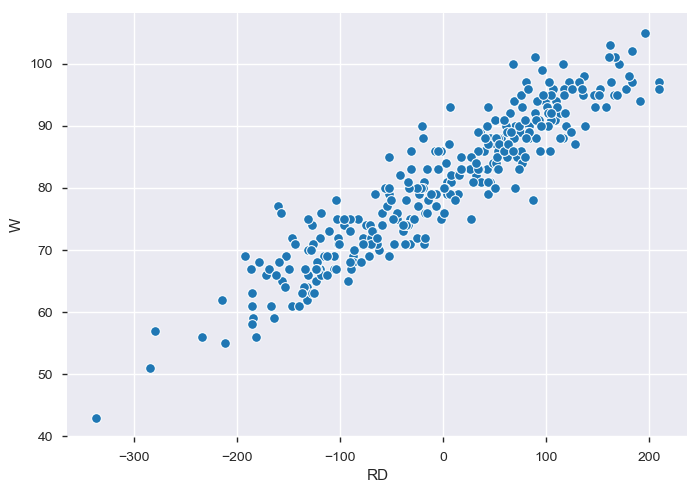

In [32]:
sns.scatterplot(money.RD, money.W)

In [45]:
lm = smf.ols(formula = 'W ~ RD', data = money).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     2010.
Date:                Wed, 26 Jun 2019   Prob (F-statistic):          1.74e-134
Time:                        23:41:23   Log-Likelihood:                -845.42
No. Observations:                 300   AIC:                             1695.
Df Residuals:                     298   BIC:                             1702.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.9800      0.235    345.021      0.000      80.518      81.442
RD             0.1013      0.002     44.829      0.000       0.097       0.106
==============================================================================
Omnibus:                        8.134   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.030
Skew:                           0.390   Prob(JB):                       0.0180
Kurtosis:                       3.183   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

High r2_score of 0.871, hence RD (Run Difference) is a good metric.